In [2]:
# %pip uninstall xgboost -y
# %pip install xgboost
# %pip install --upgrade pip
%pip install xgboost==2.0.3

  Using cached xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


Dataset Loaded Successfully!
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       

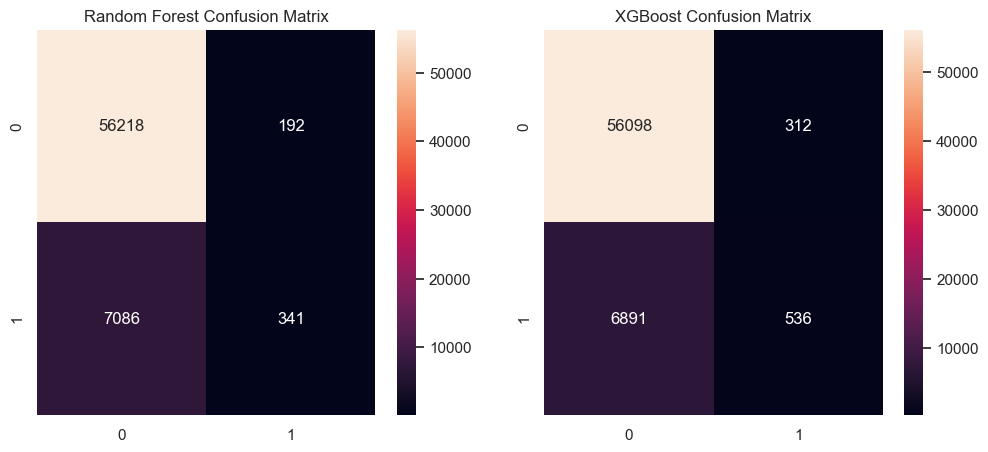

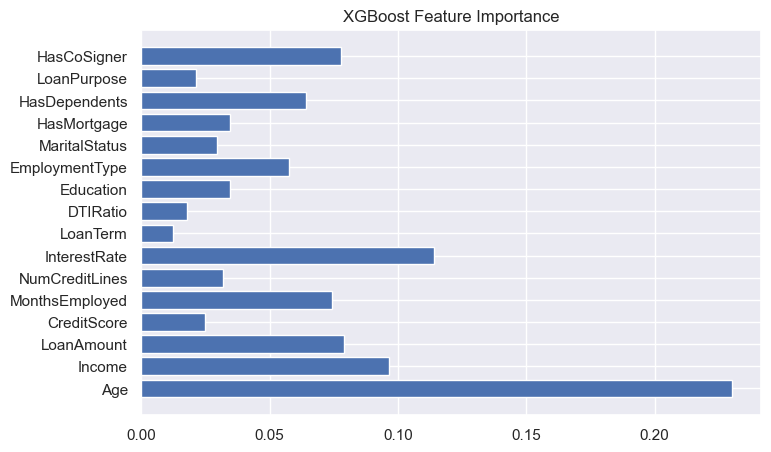

In [3]:
# ------------------------------
# 1) Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
sns.set()

# ------------------------------
# 2) Load Dataset
# ------------------------------
url = "https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/53%20DataSet/Loan_default.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully!")
print(df.head())
print("\nColumns:", df.columns.tolist())

# ------------------------------
# 3) Drop columns that cannot be used
# ------------------------------
if "LoanID" in df.columns:
    df.drop("LoanID", axis=1, inplace=True)   # Remove text ID column

# ------------------------------
# 4) Data Cleaning (Drop missing values)
# ------------------------------
df = df.dropna()

# ------------------------------
# 5) Convert Yes/No columns → 1/0
# ------------------------------
binary_cols = ["HasMortgage", "HasDependents", "HasCoSigner"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# ------------------------------
# 6) Encode categorical text columns
# ------------------------------
categorical_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]

for col in categorical_cols:
    df[col] = df[col].astype("category").cat.codes

print("\nCleaned Data:")
print(df.head())

# ------------------------------
# 7) Features and Target
# ------------------------------
target_col = "Default"

X = df.drop(target_col, axis=1)
y = df[target_col]

# ------------------------------
# 8) Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("\nTrain/Test Split Done!")

# ------------------------------
# 9) Random Forest Model
# ------------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# ------------------------------
# 10) XGBoost Model
# ------------------------------
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("\n XGBOOST RESULTS")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

# ------------------------------
# 11) Confusion Matrices
# ------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt="d", ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt="d", ax=ax[1])
ax[1].set_title("XGBoost Confusion Matrix")

plt.show()

# ------------------------------
# 12) Feature Importance (XGBoost)
# ------------------------------
plt.figure(figsize=(8,5))
importance = xgb.feature_importances_
plt.barh(X.columns, importance)
plt.title("XGBoost Feature Importance")
plt.show()

Dataset Loaded Successfully!
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       

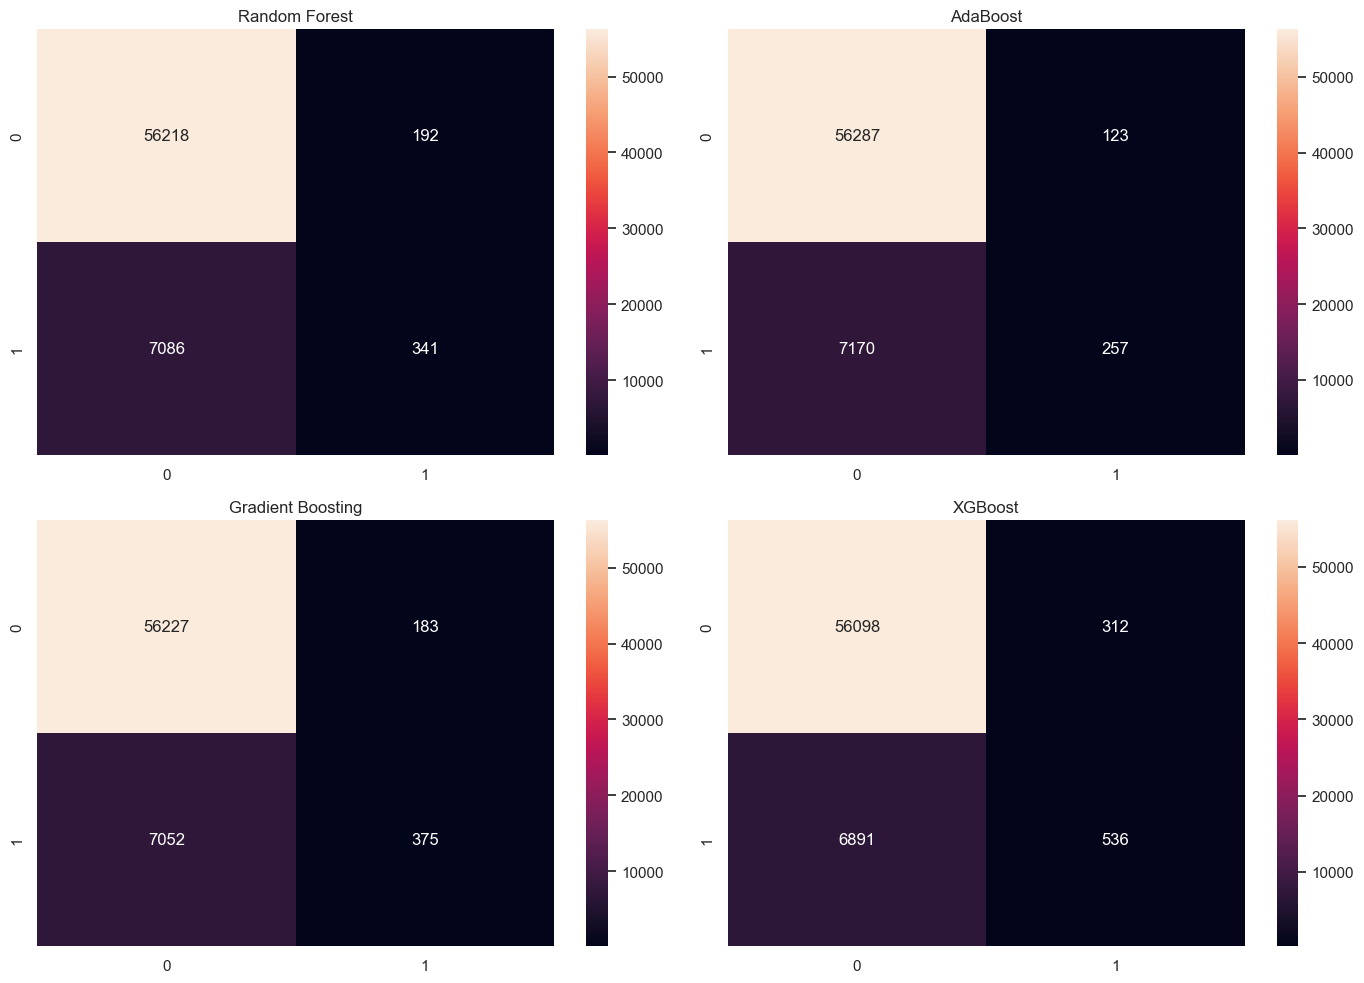

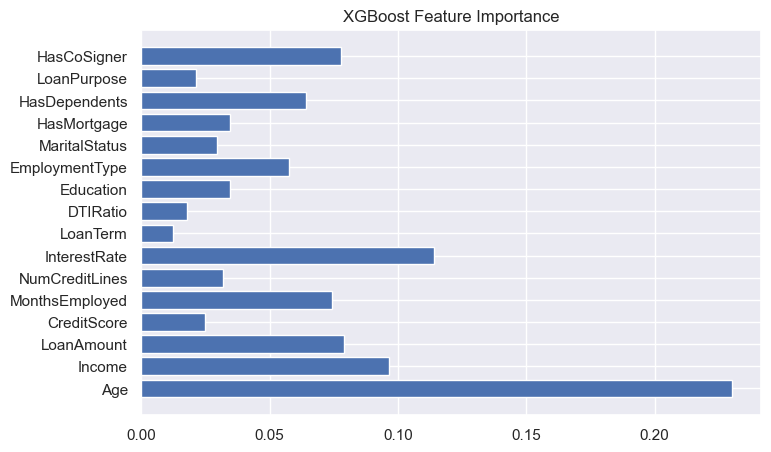

In [4]:
# ------------------------------
# 1) Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
sns.set()

# ------------------------------
# 2) Load Dataset
# ------------------------------
url = "https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/53%20DataSet/Loan_default.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully!")
print(df.head())
print("\nColumns:", df.columns.tolist())

# ------------------------------
# 3) Drop unwanted columns
# ------------------------------
if "LoanID" in df.columns:
    df.drop("LoanID", axis=1, inplace=True)

# ------------------------------
# 4) Clean missing values
# ------------------------------
df = df.dropna()

# ------------------------------
# 5) Convert Yes/No → 1/0
# ------------------------------
binary_cols = ["HasMortgage", "HasDependents", "HasCoSigner"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

# ------------------------------
# 6) Encode categorical labels
# ------------------------------
categorical_cols = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]
for col in categorical_cols:
    df[col] = df[col].astype("category").cat.codes

print("\nCleaned Data:")
print(df.head())

# ------------------------------
# 7) Features and Target
# ------------------------------
target_col = "Default"
X = df.drop(target_col, axis=1)
y = df[target_col]

# ------------------------------
# 8) Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print("\nTrain/Test Split Done!")

# ============================================================
# 9) RANDOM FOREST
# ============================================================
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\n RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# ============================================================
# 10) ADA BOOST
# ============================================================
ada = AdaBoostClassifier(
    n_estimators=150,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

print("\n ADABOOST RESULTS")
print("Accuracy:", accuracy_score(y_test, ada_pred))
print("Classification Report:\n", classification_report(y_test, ada_pred))

# ============================================================
# 11) GRADIENT BOOSTING
# ============================================================
gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("\n GRADIENT BOOSTING RESULTS")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))

# ============================================================
# 12) XGBOOST
# ============================================================
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("\n XGBOOST RESULTS")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

# ============================================================
# 13) CONFUSION MATRICES FOR ALL MODELS
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(14,10))

models = [("Random Forest", rf_pred),
          ("AdaBoost", ada_pred),
          ("Gradient Boosting", gb_pred),
          ("XGBoost", xgb_pred)]

for ax, (title, pred) in zip(axes.flatten(), models):
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

# ============================================================
# 14) FEATURE IMPORTANCE (XGBoost)
# ============================================================
plt.figure(figsize=(8, 5))
plt.barh(X.columns, xgb.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()
